In [1]:
import numpy as np
import pandas as pd

In [2]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [3]:
# Combine data from years 2000-2019

df_list = [pd.read_csv('wta_matches_' + str(year) + '.csv') for year in range(2000,2020)]

In [4]:
matches = obscure_features(pd.concat(df_list, axis = 0))

In [5]:
matches.index = range(matches.shape[0])

In [6]:
# Player rankings from 2000-2019

rankings_10s = pd.read_csv('wta_rankings_10s.csv', header = None)
rankings_10s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings_00s = pd.read_csv('wta_rankings_00s.csv', header = None)
rankings_00s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings = pd.concat([rankings_00s, rankings_10s])

rankings.index = range(rankings.shape[0])

rankings

,week,ranking,player_id,ranking_points,tours
0,20000101,1,200001,6074.0,NaN
1,20000103,1,200001,6074.0,NaN
2,20000110,1,200001,6074.0,NaN
3,20000117,1,200001,6003.0,NaN
4,20000124,1,200001,6003.0,NaN
...,...,...,...,...,...
1208119,20141110,1242,223123,3.0,NaN
1208120,20191209,1047,223179,NaN,NaN
1208121,20191216,996,223179,NaN,NaN
1208122,20191223,948,223179,NaN,NaN


In [7]:
# Convert ranking dates to datetime

rankings['week'] = pd.to_datetime(rankings['week'], format = '%Y%m%d')
rankings.head()

,week,ranking,player_id,ranking_points,tours
0,2000-01-01,1,200001,6074.0,NaN
1,2000-01-03,1,200001,6074.0,NaN
2,2000-01-10,1,200001,6074.0,NaN
3,2000-01-17,1,200001,6003.0,NaN
4,2000-01-24,1,200001,6003.0,NaN


In [8]:
from datetime import timedelta

In [9]:
# Convert tournament dates to datetime

matches['tourney_date'] = pd.to_datetime(matches.tourney_date, format = '%Y%m%d')
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [10]:
import re

In [11]:
#remove rows whose scores contain letters, indicating a retirement, default, or walkover

score_mask = matches['score'].apply(lambda x: bool(re.findall('[a-zA-Z]', x)))
matches = matches[~score_mask]
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [12]:
# remove parenthetical portion of score for tie-breakers

scores = matches['score'].copy()
matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))
matches

<ipython-input-12-3360d3b89326>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [13]:
# Function indicating number of games played in match

def total_games(s):
    num_list = re.findall('\d+', s)
    num_list = [int(x) for x in num_list]
    return sum(num_list)

matches['total_games'] = matches['score'].apply(total_games)
matches

<ipython-input-13-29b95c48bdb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['total_games'] = matches['score'].apply(total_games)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [14]:
matches.index = range(matches.shape[0])
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
56283,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
56284,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
56285,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [15]:
# Arrange matches chronologically
# This will be important, as many added features are based on a player's previous performance

matches2 = matches.copy().sort_values(by = ['tourney_date', 'tourney_id', 'match_num'])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
1995,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1996,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
1997,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
1998,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
1999,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54121,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
54122,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
54123,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
54124,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [16]:
matches2.index = range(matches2.shape[0])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [17]:
# want to add columns containing head-to-heads between players from previous matches.

# first add column with both players' names

matches2['players'] = list(zip(matches2['player_1_name'], matches2['player_2_name']))
matches2

g = matches2.groupby('players')
df_list = []

#group by (player_1_name, player_2_name) and keep running total of wins by each player

for group, df in g:
    df = df[['winner']]
    
    n = df.shape[0]
    
    player_1_h2h = np.zeros(n)
    player_2_h2h = np.zeros(n)
    
    p1 = group[0]
    p2 = group[1]

    for i in range(1,n):
        if df.iloc[i-1,0] == p1:
            player_1_h2h[i] = player_1_h2h[i-1] + 1
            player_2_h2h[i] = player_2_h2h[i-1]
        else:
            player_1_h2h[i] = player_1_h2h[i-1]
            player_2_h2h[i] = player_2_h2h[i-1] + 1
            
    df['player_1_h2h'] = player_1_h2h
    df['player_2_h2h'] = player_2_h2h
    
    df_list.append(df)

<ipython-input-17-9b62f9672b42>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_1_h2h'] = player_1_h2h
<ipython-input-17-9b62f9672b42>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_2_h2h'] = player_2_h2h


In [18]:
# combine the above into single data frame

df_h2h = pd.concat(df_list, axis = 0)
df_h2h

,winner,player_1_h2h,player_2_h2h
36642,Abigail Guthrie,0.0,0.0
36585,Abigail Guthrie,0.0,0.0
5471,Adriana Serra Zanetti,0.0,0.0
21417,Ahsha Rolle,0.0,0.0
16294,Aiko Nakamura,0.0,0.0
...,...,...,...
20259,Yurika Sema,0.0,0.0
20273,Yurika Sema,0.0,0.0
41539,Zarina Diyas,0.0,0.0
22520,Yung Jan Chan,0.0,0.0


In [19]:
df_h2h = df_h2h.drop('winner', axis = 1)
df_h2h

,player_1_h2h,player_2_h2h
36642,0.0,0.0
36585,0.0,0.0
5471,0.0,0.0
21417,0.0,0.0
16294,0.0,0.0
...,...,...
20259,0.0,0.0
20273,0.0,0.0
41539,0.0,0.0
22520,0.0,0.0


In [20]:
#merge with matches2 data frame

matches2 = pd.merge(matches2, df_h2h, left_index = True, right_index = True)
matches2 = matches2.drop('players', axis = 1)
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [21]:
# impute missing player rankings

n = matches2.shape[0]

p1_rank_missing = matches2['player_1_rank'].isnull()
p2_rank_missing = matches2['player_2_rank'].isnull()

for i in range(n):
    if p1_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p1_id = matches2.loc[i, 'player_1_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p1_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_1_rank'] = rankings.loc[mask, 'ranking'][0]
            
    if p2_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p2_id = matches2.loc[i, 'player_2_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p2_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_2_rank'] = rankings.loc[mask, 'ranking'][0]
            
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [22]:
#rankings from Rome 2004 tournament are still missing, for some reason
#some rankings for this week appear to be missing from the rankings data frame
#impute with rankings from the week before instead

rome_indices = matches2[matches2['tourney_id'] == '2004-W-T1-ITA-01A-2004'].index

for i in rome_indices:
    p1_id = matches2.loc[i, 'player_1_id']
    p2_id = matches2.loc[i, 'player_2_id']
    
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p1_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_1_rank'] = rankings.loc[idx, 'ranking']
        
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p2_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_2_rank'] = rankings.loc[idx, 'ranking']

In [23]:
# a column indicating whether the match was won by player 1 or player 2
# will serve as the target variable for machine learning models

matches2['target'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              'player_1',
                              'player_2')
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0,player_2
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0,player_2
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0,player_1
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0,player_1
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0,player_1
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0,player_2
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0,player_1
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0,player_1


In [24]:
# a column indicating a player's overall win % prior to the match

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby('player')

df_list = []
for group, df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_matches',
                  'player_' + str(int(group)) + '_wins']
    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-24-4acc233acc80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-24-4acc233acc80>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [25]:
def winpct(x, y):
    '''
    Find a player's win %
    x = number of matches
    y = number of wins
    if x = 0, return 0
    '''
    if x == 0:
        return 0
    else:
        return y/x

winpct_vec = np.vectorize(winpct, otypes=[np.float])
matches2['player_1_win_pct'] = winpct_vec(matches2['player_1_matches'], matches2['player_1_wins'])
matches2['player_2_win_pct'] = winpct_vec(matches2['player_2_matches'], matches2['player_2_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,13,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,14,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,19,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,27,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,21,0.0,0.0,player_1,168,82,51,24,0.488095,0.470588
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,18,0.0,0.0,player_2,98,42,116,61,0.428571,0.525862
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,24,0.0,0.0,player_1,169,83,16,8,0.491124,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,21,0.0,0.0,player_1,117,62,109,43,0.529915,0.394495


In [26]:
# a column indicating a player's recent form
# recent form is overall win % plus a "penalty" of log10(1-(overall win % ) + (last 6 months win %))

n = matches2.shape[0]

player_1_recent_form = np.zeros(n)
player_2_recent_form = np.zeros(n)

for i in range(n):
    p1 = matches2.loc[i, 'player_1_name']
    p2 = matches2.loc[i, 'player_2_name']
    
    current_date = matches2.loc[i, 'tourney_date']
    match_number = matches2.loc[i, 'match_num']
    
    mask1 = matches2['tourney_date'] < current_date
    mask2 = (matches2['tourney_date'] == current_date) & (matches2['match_num'] < match_number)
    mask3 = matches2['tourney_date'] >= current_date - timedelta(180)
    
    recent_matches = matches2[(mask1 | mask2) & mask3]
    
    mask1 = (recent_matches['player_1_name'] == p1) | (recent_matches['player_2_name'] == p1)
    mask2 = (recent_matches['winner'] == p1)
    
    p1_matches = recent_matches[mask1].shape[0]
    p1_wins = recent_matches[mask2].shape[0]
    
    player_1_recent_form[i] = (matches2.loc[i, 'player_1_win_pct']
                               + np.log10(1 - matches2.loc[1, 'player_1_win_pct']
                                          + winpct(p1_matches, p1_wins)))
    
    mask1 = (recent_matches['player_1_name'] == p2) | (recent_matches['player_2_name'] == p2)
    mask2 = (recent_matches['winner'] == p2)
    
    p2_matches = recent_matches[mask1].shape[0]
    p2_wins = recent_matches[mask2].shape[0]
    
    player_2_recent_form[i] = (matches2.loc[i, 'player_2_win_pct']
                               + np.log10(1 - matches2.loc[1, 'player_2_win_pct']
                                          + winpct(p2_matches, p2_wins)))

In [27]:
matches2['player_1_recent_form'] = player_1_recent_form
matches2['player_2_recent_form'] = player_2_recent_form
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.0,player_1,168,82,51,24,0.488095,0.470588,0.606195,0.638079
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.0,player_2,98,42,116,61,0.428571,0.525862,0.588272,0.735562
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.0,player_1,169,83,16,8,0.491124,0.500000,0.622403,0.676091
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.0,player_1,117,62,109,43,0.529915,0.394495,0.742989,0.605349


In [28]:
print('number of observations with \'surface\' missing:', matches2['surface'].isnull().sum())

# there are 124 matches with the feature 'surface' missing
# however, many of these matches are from the same tournament
# this makes it feasible to look up these tournaments and impute the exact values.
missing_surface = matches2[matches2['surface'].isnull()][['tourney_name', 'tourney_date']]
for i in missing_surface.index:
    print(str(i)+':', missing_surface.loc[i, 'tourney_name'], missing_surface.loc[i, 'tourney_date'])

number of observations with 'surface' missing: 124
18341: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
18342: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
20907: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20908: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20909: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20910: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20911: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
20912: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
23000: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23001: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23018: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23019: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23022: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23023: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23028: Fed Cup G2 PO: KAZ vs KOR 2008-02-02 00:00:00
23029: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23030: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23031: Fed Cup G2 PO: SYR vs TKM 2008-02-02 00:0

In [29]:
# Surfaces to impute, listed by index

missing_surface_dict = {18341: 'Clay',
                        18342: 'Clay',
                        20907: 'Hard',
                        20908: 'Hard',
                        20909: 'Hard',
                        20910: 'Hard',
                        20911: 'Hard',
                        20912: 'Hard',
                        23000: 'Hard',
                        23001: 'Hard',
                        23018: 'Clay',
                        23019: 'Clay',
                        23022: 'Hard',
                        23023: 'Hard',
                        23028: 'Hard',
                        23029: 'Hard',
                        23030: 'Hard',
                        23031: 'Hard',
                        23032: 'Hard',
                        34517: 'Clay',
                        34518: 'Clay',
                        34519: 'Clay',
                        34520: 'Clay',
                        34521: 'Clay',
                        34522: 'Clay',
                        34523: 'Clay',
                        34524: 'Clay',
                        39936: 'Hard',
                        39937: 'Hard',
                        39938: 'Hard',
                        39939: 'Hard',
                        39940: 'Hard',
                        39941: 'Hard',
                        39942: 'Hard',
                        39943: 'Hard',
                        39944: 'Hard',
                        39945: 'Hard',
                        39946: 'Hard',
                        39947: 'Hard',
                        41734: 'Hard',
                        41735: 'Hard',
                        41736: 'Hard',
                        44676: 'Hard',
                        44677: 'Hard',
                        44678: 'Hard',
                        44679: 'Hard',
                        44680: 'Hard',
                        44681: 'Hard',
                        44682: 'Hard',
                        44683: 'Hard',
                        44712: 'Hard',
                        44713: 'Hard',
                        44714: 'Hard',
                        44715: 'Hard',
                        44716: 'Hard',
                        44717: 'Hard',
                        44718: 'Hard',
                        44719: 'Hard',
                        44748: 'Hard',
                        44749: 'Hard',
                        44750: 'Hard',
                        44751: 'Hard',
                        44752: 'Hard',
                        44753: 'Hard',
                        44754: 'Hard',
                        44755: 'Hard',
                        44784: 'Hard',
                        44785: 'Hard',
                        44786: 'Hard',
                        44787: 'Hard',
                        44788: 'Hard',
                        44789: 'Hard',
                        44790: 'Hard',
                        44791: 'Hard',
                        44818: 'Hard',
                        44819: 'Hard',
                        44820: 'Hard',
                        44821: 'Hard',
                        44822: 'Hard',
                        44823: 'Hard',
                        44824: 'Hard',
                        44825: 'Hard',
                        49231: 'Clay',
                        49232: 'Clay',
                        49233: 'Clay',
                        49234: 'Clay',
                        49235: 'Clay',
                        49236: 'Clay',
                        49237: 'Clay',
                        49238: 'Clay',
                        49239: 'Clay',
                        49240: 'Clay',
                        49241: 'Clay',
                        49242: 'Clay',
                        49243: 'Clay',
                        49244: 'Clay',
                        49245: 'Clay',
                        49246: 'Clay',
                        49247: 'Clay',
                        49248: 'Clay',
                        49249: 'Clay',
                        49250: 'Clay',
                        49281: 'Clay',
                        49282: 'Clay',
                        49283: 'Clay',
                        49284: 'Clay',
                        49285: 'Clay',
                        49286: 'Clay',
                        49287: 'Clay',
                        49288: 'Clay',
                        49289: 'Clay',
                        49290: 'Clay',
                        49299: 'Clay',
                        49300: 'Clay',
                        49301: 'Clay',
                        49302: 'Clay',
                        49303: 'Clay',
                        49304: 'Clay',
                        49305: 'Clay',
                        49306: 'Clay',
                        49307: 'Clay',
                        49308: 'Clay',
                        49309: 'Clay',
                        49310: 'Clay',
                       }

In [30]:
for idx, surface in missing_surface_dict.items():
    matches2.loc[idx, 'surface'] = surface

In [31]:
matches2['surface'].isnull().sum() #all missing 'surface' values imputed

0

In [32]:
# player's win % on surface

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['surface', 'player'])

df_list = []
for (group, surface), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'surface', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_surface_matches',
                  'player_' + str(int(group)) + '_surface_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-32-6aff1d8fb3f4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-32-6aff1d8fb3f4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [33]:
matches2['player_1_surface_win_pct'] = winpct_vec(matches2['player_1_surface_matches'],
                                                  matches2['player_1_surface_wins'])
matches2['player_2_surface_win_pct'] = winpct_vec(matches2['player_2_surface_matches'],
                                                  matches2['player_2_surface_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form,player_1_surface_matches,player_1_surface_wins,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.488095,0.470588,0.606195,0.638079,123,65,27,10,0.528455,0.370370
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.428571,0.525862,0.588272,0.735562,59,26,82,50,0.440678,0.609756
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.491124,0.500000,0.622403,0.676091,124,66,10,5,0.532258,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.529915,0.394495,0.742989,0.605349,83,51,95,41,0.614458,0.431579


In [34]:
matches2['tourney_level'].value_counts()

#different tournament levels:
    #I: international
    #G: grand slam
    #P: premier
    #D: fed cup
    #T1: tier 1 (no longer in existence, roughly equivalent to PM)
    #T3: tier 3 (no longer in existence, roughly equivalent to I)
    #T2: tier 2 (no longer in existence, roughly equivalent to P)
    #T4: tier 3 (no longer in existence, roughly equivalent to I)
    #C: challenger/ITF
    #T5: tier 3 (no longer in existence, roughly equivalent to I)
    #CC: challenger/ITF
    #F: Tour finals
    #O: Olympics
    #W: Tour finals

I     10706
G     10014
P      6854
D      6141
T1     4485
T3     4397
T2     4165
PM     3044
T4     2807
C      1323
T5      890
CC      736
F       401
O       309
W        15
Name: tourney_level, dtype: int64

In [35]:
# Remove redundant and outdated tournament levels

matches2['tourney_level'] = matches2['tourney_level'].str.replace('T1', 'PM')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T2', 'P')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T3', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T4', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T5', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('W', 'F')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('CC', 'C')
matches2['tourney_level'].value_counts()

I     18800
P     11019
G     10014
PM     7529
D      6141
C      2059
F       416
O       309
Name: tourney_level, dtype: int64

In [36]:
# win % at different tourney levels

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['tourney_level', 'player'])

df_list = []
for (group, tourney_level), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
    
all_players = pd.concat(df_list, axis = 0)


for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'tourney_level', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_level_matches',
                  'player_' + str(int(group)) + '_level_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-36-2d6cc0779756>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-36-2d6cc0779756>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [37]:
matches2['player_1_level_win_pct'] = winpct_vec(matches2['player_1_level_matches'],
                                                  matches2['player_1_level_wins'])
matches2['player_2_level_win_pct'] = winpct_vec(matches2['player_2_level_matches'],
                                                  matches2['player_2_level_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,1,6-0 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,2,6-2 6-3,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,3,6-0 6-2,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,4,6-3 6-4,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,27,10,0.528455,0.370370,49,24,36,18,0.489796,0.500000
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,82,50,0.440678,0.609756,55,23,57,30,0.418182,0.526316
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,10,5,0.532258,0.500000,50,25,13,7,0.500000,0.538462
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [38]:
#there is an overabundance of the value 0 in many engineered features,
#which will lead to inaccuracy in predictions
#to resolve this, restrict to matches in which both players have played at least 100 matches
#thus, the following predictive models should only be used to predict winner between players who have played
#100 matches in their career at the 8 tournament levels considered in this project

mask = (matches2['player_1_matches'] >= 100) & (matches2['player_2_matches'] >= 100)
matches3 = matches2[mask].copy()

print(matches3.shape[0])
matches3 #we still have 18000+ observations

18185


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
5250,2001-W-T2-USA-06A-2001,New Haven,Hard,28,P,2001-08-19,24,6-4 6-3,3,QF,...,59,43,0.560976,0.728814,24,14,17,9,0.583333,0.529412
5350,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,98,6-4 7-5,3,R32,...,44,26,0.613636,0.590909,25,18,23,16,0.720000,0.695652
5365,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,113,6-4 6-0,3,R16,...,86,75,0.577778,0.872093,24,16,41,34,0.666667,0.829268
5367,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,115,6-3 0-6 6-3,3,R16,...,86,73,0.488889,0.848837,19,11,36,31,0.578947,0.861111
5372,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,120,6-3 6-3,3,R16,...,64,47,0.543860,0.734375,24,16,38,33,0.666667,0.868421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,2019-1072,Limoges,Hard,32,I,2019-12-16,281,6-4 6-4,3,R32,...,61,25,0.511450,0.409836,115,63,74,36,0.547826,0.486486
56272,2019-1072,Limoges,Hard,32,I,2019-12-16,285,6-4 2-6 6-3,3,R32,...,293,148,0.600000,0.505119,55,28,166,92,0.509091,0.554217
56278,2019-1072,Limoges,Hard,32,I,2019-12-16,291,6-3 6-3,3,R16,...,266,130,0.403226,0.488722,75,36,215,113,0.480000,0.525581
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [39]:
p1_missing_rank = matches3[matches3['player_1_rank'].isnull()][['player_1_name', 'player_1_id', 'tourney_name', 'tourney_date']]
p1_missing_rank
#there are still some rankings missing
#these are players that were unranked at the time of the match

,player_1_name,player_1_id,tourney_name,tourney_date
19074,Chanda Rubin,200039,Stanford,2006-07-24
19382,Chanda Rubin,200039,US Open,2006-08-28
19592,Chanda Rubin,200039,Luxembourg,2006-09-25
19603,Chanda Rubin,200039,Luxembourg,2006-09-25
19769,Elena Bovina,200764,Moscow,2006-10-09
22703,Jelena Dokic,200120,Hobart,2008-01-07
27314,Kim Clijsters,200079,Cincinnati,2009-08-10
27337,Kim Clijsters,200079,Cincinnati,2009-08-10
27352,Kim Clijsters,200079,Cincinnati,2009-08-10
27391,Kim Clijsters,200079,Toronto,2009-08-17


In [40]:
p2_missing_rank = matches3[matches3['player_2_rank'].isnull()][['player_2_name', 'player_2_id', 'tourney_name', 'tourney_date']]
p2_missing_rank

,player_2_name,player_2_id,tourney_name,tourney_date
12228,Sandrine Testud,200016,Doha,2004-03-01
12239,Sandrine Testud,200016,Doha,2004-03-01
14771,Martina Hingis,200001,Pattaya,2005-01-31
17265,Martina Hingis,200001,Gold Coast,2006-01-02
17274,Martina Hingis,200001,Gold Coast,2006-01-02
17281,Martina Hingis,200001,Gold Coast,2006-01-02
17319,Martina Hingis,200001,Sydney,2006-01-09
22093,Yoon Jeong Cho,201313,US Open,2007-08-27
27275,Meghann Shaughnessy,200046,Los Angeles,2009-08-03
27358,Kim Clijsters,200079,Cincinnati,2009-08-10


In [51]:
# all players above are unranked because of long layoffs
# (coming out of retirement and/or returning from injury)
# the lowest ranking in the data set is approx. 1300, which could be used as a stand-in for 'unranked'
# however, imputing for 'unranked' in this way may not accurately reflect the player's potential of winning
# e.g. Kim Clijsters won the US Open as an unranked player after returning from a 2+ year retirement
# she was a highly accomplished player before her retirement, and imputed ranking should ideally reflect this
# imputation strategy: find the player's ranking at the time they played their last match before layoff
# penalize this ranking by the length of the layoff (add 1 to ranking per month since last match)

In [41]:
for i in p1_missing_rank.index:
    player_id = p1_missing_rank.loc[i, 'player_1_id']
    current_date = p1_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_1_id'] == player_id))
             & (~matches2['player_1_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_1_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)
    
for i in p2_missing_rank.index:
    player_id = p2_missing_rank.loc[i, 'player_2_id']
    current_date = p2_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_2_id'] == player_id))
             & (~matches2['player_2_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_2_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)

In [42]:
matches3.loc[p1_missing_rank.index][['player_1_name', 'player_1_rank']] #rankings imputed

,player_1_name,player_1_rank
19074,Chanda Rubin,136.0
19382,Chanda Rubin,138.0
19592,Chanda Rubin,138.0
19603,Chanda Rubin,138.0
19769,Elena Bovina,31.0
22703,Jelena Dokic,394.0
27314,Kim Clijsters,34.0
27337,Kim Clijsters,34.0
27352,Kim Clijsters,34.0
27391,Kim Clijsters,34.0


In [43]:
matches3.loc[p2_missing_rank.index][['player_2_name', 'player_2_rank']] #rankings imputed

,player_2_name,player_2_rank
12228,Sandrine Testud,31.0
12239,Sandrine Testud,31.0
14771,Martina Hingis,38.0
17265,Martina Hingis,49.0
17274,Martina Hingis,49.0
17281,Martina Hingis,49.0
17319,Martina Hingis,50.0
22093,Yoon Jeong Cho,93.0
27275,Meghann Shaughnessy,77.0
27358,Kim Clijsters,32.0


In [44]:
matches3.isnull().sum()[matches3.isnull().sum() > 0]

# all remaining columns containing missingness will not be used in predictive models

minutes                 13281
w_ace                    4294
w_df                     4310
w_svpt                   4293
w_1stIn                  4293
w_1stWon                 4293
w_2ndWon                 4293
w_SvGms                 12491
w_bpSaved                4296
w_bpFaced                4296
l_ace                    4296
l_df                     4310
l_svpt                   4293
l_1stIn                  4293
l_1stWon                 4293
l_2ndWon                 4293
l_SvGms                 12491
l_bpSaved                4295
l_bpFaced                4295
player_1_entry          16553
player_2_entry          16288
player_1_ht              3979
player_2_ht              3520
player_1_rank_points       61
player_2_rank_points       55
player_1_seed            9298
player_2_seed            9806
dtype: int64

In [45]:
# Some values of 'hand' are missing in the form of a 'U' standing in for 'R' or 'L'

matches3[matches3['player_1_hand'] == 'U']['player_1_name']

23654      Camille Pin
24160      Camille Pin
24247      Camille Pin
24259      Camille Pin
24582      Camille Pin
24645      Camille Pin
25016      Camille Pin
25117      Camille Pin
25483      Camille Pin
26186      Camille Pin
26669      Camille Pin
27465      Camille Pin
37878    Olga Puchkova
38301    Olga Puchkova
Name: player_1_name, dtype: object

In [46]:
matches3[matches3['player_2_hand'] == 'U']['player_2_name']

25825      Camille Pin
25861      Camille Pin
26400      Camille Pin
37788    Olga Puchkova
38563    Olga Puchkova
Name: player_2_name, dtype: object

In [47]:
# Only players for whom handedness is 'U' (unknown) are Camille Pin and Olga Puchkova
# Both are right-handed per a quick internet search, so can replace each U with R

matches3['player_1_hand'] = matches3['player_1_hand'].str.replace('U', 'R')
matches3['player_2_hand'] = matches3['player_2_hand'].str.replace('U', 'R')

In [48]:
# Features to be used in predictive models
# Will try five different classification models:
    # Gradient boosting
    # Random forest
    # Logistic regression
    # Support vector machine
    # Linear discriminant analysis

X = matches3[['player_1_age',
              'player_2_age',
              'player_1_hand',
              'player_2_hand',
              'player_1_rank',
              'player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_surface_win_pct',
              'player_2_surface_win_pct',
              'player_1_level_win_pct',
              'player_2_level_win_pct',
              'surface',
              'tourney_level'
             ]]

y = matches3['target']

In [49]:
X

,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,surface,tourney_level
5250,18.354552,25.390828,R,R,14.0,2.0,0.0,2.0,0.860988,1.000595,0.560976,0.728814,0.583333,0.529412,Hard,P
5350,29.691992,18.376454,R,R,21.0,13.0,1.0,1.0,0.877322,0.871237,0.613636,0.590909,0.720000,0.695652,Hard,G
5365,18.376454,20.906229,R,R,13.0,1.0,0.0,1.0,0.866819,1.101975,0.577778,0.872093,0.666667,0.829268,Hard,G
5367,25.968515,25.218344,R,R,27.0,3.0,0.0,3.0,0.712341,1.120085,0.488889,0.848837,0.578947,0.861111,Hard,G
5372,25.464750,25.412731,R,R,19.0,2.0,0.0,0.0,0.785073,1.005230,0.543860,0.734375,0.666667,0.868421,Hard,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,25.724846,23.186858,R,R,47.0,84.0,0.0,1.0,0.721849,0.591410,0.511450,0.409836,0.547826,0.486486,Hard,I
56272,25.084189,32.224504,R,R,42.0,117.0,0.0,0.0,0.719649,0.594939,0.600000,0.505119,0.509091,0.554217,Hard,I
56278,23.186858,29.691992,R,R,84.0,74.0,1.0,0.0,0.609162,0.665315,0.403226,0.488722,0.480000,0.525581,Hard,I
56285,25.084189,26.787132,R,R,42.0,142.0,0.0,0.0,0.742989,0.605349,0.614458,0.431579,0.534483,0.333333,Hard,I


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [51]:
mask1 = (matches3['player_1_rank'] < matches3['player_2_rank']) & (matches3['target'] == 'player_1')
mask2 = (matches3['player_2_rank'] < matches3['player_1_rank']) & (matches3['target'] == 'player_2')

matches3[mask1 | mask2].shape[0] / matches3.shape[0]

# 66.21% of matches won by higher-ranked player. Treat this as 'baseline' of success for models.

0.6621391256530107

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# encode categorical variables with numbers
# this is required for ensembling techniques

lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns.
    '''
    categ_cols = ['player_1_hand', 'player_2_hand', 'surface', 'tourney_level']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_ens = X_train.copy()
X_test_ens = X_test.copy()

X_train_ens = numer_label(X_train_ens)
X_test_ens = numer_label(X_test_ens)

In [81]:
gbc = GradientBoostingClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [500, 1000, 2000],
             'max_depth': [3, 4],
             'learning_rate': [.001, .01],
             'subsample': [.5, 1]}

gs = GridSearchCV(gbc, gs_params, cv = 5)

gs.fit(X_train_ens, y_train)

gbc_best = gs.best_estimator_

print(gbc_best)
print(gbc_best.score(X_train_ens, y_train))
print(gbc_best.score(X_test_ens, y_test)) #improvement on baseline
                                          #possibly slight overfitting, but not terribly worrying

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='sqrt',
                           n_estimators=500, subsample=0.5)
0.7224360736871047
0.7077261479241133


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Feature importances (gradient boosting classifier)')

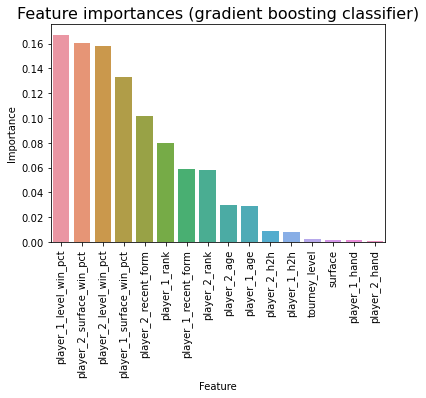

In [275]:
# Feature importances as determined by best gbc model

feat_imp = sorted(list(zip(X_train_ens.columns, gbc_best.feature_importances_)), key = lambda x: -x[1])

feat_imp_df = pd.DataFrame({'feature': [x[0] for x in feat_imp],
                            'importance': [x[1] for x in feat_imp]})

sns.barplot(data = feat_imp_df, x = 'feature', y = 'importance')

plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title('Feature importances (gradient boosting classifier)', size = 16)

In [120]:
rfc = RandomForestClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [500, 1000, 2000],
             'max_depth': [3, 4, 5]}

gs = GridSearchCV(rfc, gs_params, cv = 5)
gs.fit(X_train_ens, y_train)

rfc_best = gs.best_estimator_

rfc_best.fit(X_train_ens, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=2000)

In [121]:
print(rfc_best)
print(rfc_best.score(X_train_ens, y_train))
print(rfc_best.score(X_test_ens, y_test)) # Slight improvement on baseline, no overfitting

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=2000)
0.70889469342865
0.6997525433049216


Text(0.5, 1.0, 'Feature importances (random forest classifier)')

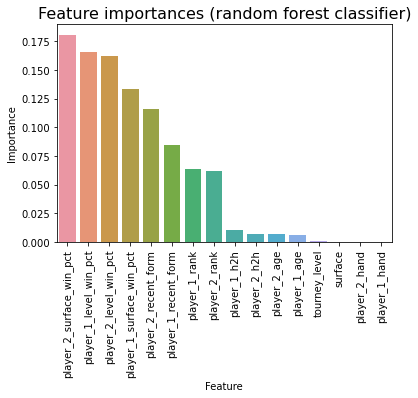

In [277]:
#feature importances as determined by rfc
#similar to gbc features importances.
#only major change is that player ages are notably less important in rfc than in gbc

feat_imp = sorted(list(zip(X_train_ens.columns, rfc_best.feature_importances_)), key = lambda x: -x[1])

feat_imp_df = pd.DataFrame({'feature': [x[0] for x in feat_imp],
                            'importance': [x[1] for x in feat_imp]})

sns.barplot(data = feat_imp_df, x = 'feature', y = 'importance')

plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title('Feature importances (random forest classifier)', size = 16)

In [92]:
X_train_log = X_train.copy()
X_train_log = pd.get_dummies(X_train_log, drop_first = True)

X_test_log = X_test.copy()
X_test_log = pd.get_dummies(X_test_log, drop_first = True)

In [93]:
logit = LogisticRegression(solver='liblinear')

gs_params = {'C': 10**np.linspace(-2, 2, 26)}
gs = GridSearchCV(logit, gs_params, cv = 5)

gs.fit(X_train_log, y_train)

log_best = gs.best_estimator_

print(log_best)
print(log_best.score(X_train_log, y_train))
print(log_best.score(X_test_log, y_test)) #improvement on baseline, no overfitting
                                          #improvement over all previous models

LogisticRegression(C=0.5754399373371569, solver='liblinear')
0.7040830354687929
0.7113005224085786


In [112]:
svc = SVC(kernel = 'poly')

gs_params = {'C': np.logspace(-1, np.log10(50), 5),
             'degree': [1,2]}

gs = GridSearchCV(svc, gs_params, cv = 5)

gs.fit(X_train_ens, y_train)
svc_best = gs.best_estimator_

SVC(C=49.99999999999999, degree=1, kernel='poly')


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [114]:
print(svc_best)
print(svc_best.score(X_train_ens, y_train))
print(svc_best.score(X_test_ens, y_test)) #improvement on baseline, no overfitting
                                          #performs worse than linear model

SVC(C=49.99999999999999, degree=1, kernel='poly')
0.6913665108605994
0.7036018696728072


In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
lda = LinearDiscriminantAnalysis()

In [106]:
lda.fit(X_train_ens, y_train)

LinearDiscriminantAnalysis()

In [107]:
print(lda.score(X_train_ens, y_train))
print(lda.score(X_test_ens, y_test)) #this was our best model
                                     #no overfitting

0.7045642012647787
0.7143249931262029


In [123]:
# Want to examine the performance of the best model (LDA) more in-depth

lda_predictions = lda.predict(X_test_ens)
lda_predictions

array(['player_2', 'player_2', 'player_2', ..., 'player_2', 'player_1',
       'player_2'], dtype='<U8')

In [124]:
# Specifically, want to study the case when the lower-ranked player is correctly chosen as the winner

pred_rows = matches3.loc[y_test.index].copy()
pred_rows['prediction'] = lda_predictions

pred_rows = pred_rows[['surface',
                       'tourney_level',
                       'target', 
                       'prediction',
                       'player_1_rank',
                       'player_2_rank',
                       'player_1_h2h',
                       'player_2_h2h',
                       'player_1_recent_form',
                       'player_2_recent_form',
                       'player_1_surface_win_pct',
                       'player_2_surface_win_pct',
                       'player_1_level_win_pct',
                       'player_2_level_win_pct']]

pred_rows['correct'] = pred_rows['target'] == pred_rows['prediction']

mask1 = (pred_rows['target'] == 'player_1') & (pred_rows['player_1_rank'] > pred_rows['player_2_rank'])
mask2 = (pred_rows['target'] == 'player_2') & (pred_rows['player_1_rank'] < pred_rows['player_2_rank'])
pred_rows['lower_ranked_won'] = mask1 | mask2
pred_rows

,surface,tourney_level,target,prediction,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,correct,lower_ranked_won
55981,Hard,P,player_1,player_2,14.0,1.0,2.0,2.0,0.841446,0.957978,0.700000,0.691667,0.693878,0.714286,False,True
18450,Clay,PM,player_2,player_2,1.0,7.0,2.0,4.0,1.043604,1.081779,0.798246,0.873786,0.768519,0.831579,True,True
53458,Hard,G,player_2,player_2,59.0,14.0,0.0,0.0,0.606088,0.841088,0.428571,0.608108,0.259259,0.652174,True,False
36021,Hard,P,player_1,player_1,14.0,20.0,0.0,0.0,0.808149,0.649476,0.568528,0.403361,0.567308,0.350877,True,False
35506,Hard,P,player_2,player_2,26.0,32.0,0.0,0.0,0.704689,0.743171,0.450980,0.565022,0.438596,0.505376,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32617,Hard,I,player_2,player_1,80.0,124.0,2.0,0.0,0.639919,0.487675,0.554404,0.410256,0.590909,0.437838,False,True
25229,Hard,P,player_1,player_1,4.0,14.0,0.0,0.0,0.930822,0.823689,0.686131,0.553333,0.677966,0.419355,True,False
23154,Hard,PM,player_2,player_2,103.0,29.0,0.0,1.0,0.647476,0.941870,0.494737,0.685484,0.486239,0.655172,True,False
55655,Hard,G,player_1,player_1,29.0,167.0,0.0,0.0,0.699778,0.732661,0.445652,0.573727,0.531250,0.540816,True,False


In [127]:
pred_rows.groupby('lower_ranked_won').agg({'correct': 'mean'}).reset_index()

# Prediction accuracy for matches where the higher ranked player won
# and where the lower ranked player won

,lower_ranked_won,correct
0,False,0.876936
1,True,0.377008


In [130]:
surfaces_accuracy = pred_rows.groupby(['surface', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
surfaces_accuracy

,surface,lower_ranked_won,correct
0,Carpet,False,0.796875
1,Carpet,True,0.347826
2,Clay,False,0.881967
3,Clay,True,0.392361
4,Grass,False,0.846743
5,Grass,True,0.415385
6,Hard,False,0.883476
7,Hard,True,0.365229


Text(6.799999999999997, 0.5, 'Prediction accuracy')

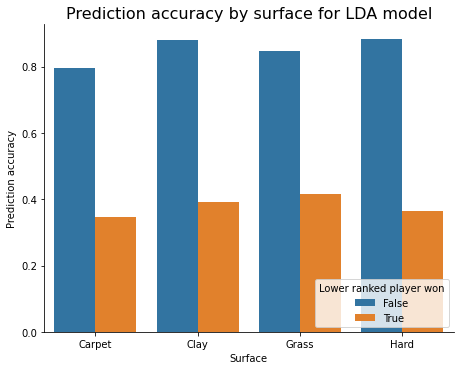

In [176]:
sns.catplot(data = surfaces_accuracy,
            x = 'surface',
            y = 'correct',
            hue = 'lower_ranked_won',
            kind = 'bar',
            legend = False,
            height = 5,
            aspect = 1.3)

plt.title('Prediction accuracy by surface for LDA model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Surface')
plt.ylabel('Prediction accuracy')

In [131]:
levels_accuracy = pred_rows.groupby(['tourney_level', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
levels_accuracy

,tourney_level,lower_ranked_won,correct
0,C,False,0.812500
1,C,True,0.571429
2,D,False,0.878378
3,D,True,0.593750
4,F,False,0.849057
5,F,True,0.521739
6,G,False,0.905282
7,G,True,0.344037
8,I,False,0.853612
9,I,True,0.391003


Text(26.124388888888895, 0.5, 'Prediction accuracy')

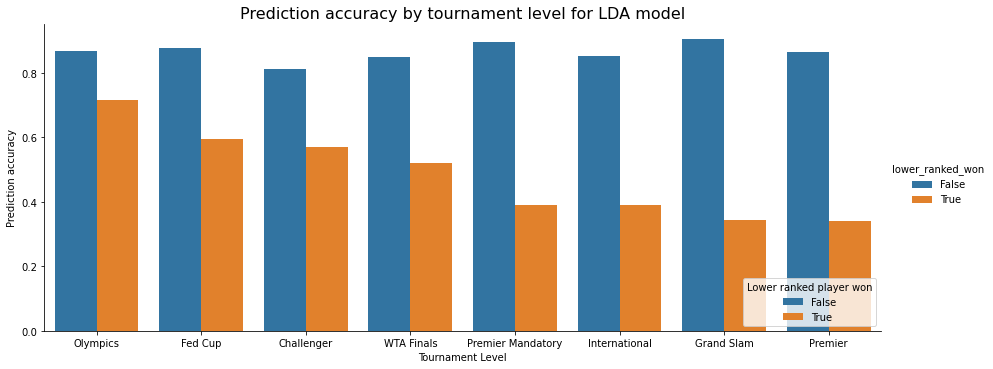

In [174]:
plot =  sns.catplot(data = levels_accuracy,
                    x = 'tourney_level',
                    y = 'correct',
                    hue = 'lower_ranked_won',
                    kind = 'bar',
                    order = ['O', 'D', 'C', 'F', 'PM', 'I', 'G', 'P'],
                    height = 5,
                    aspect = 2.5)
plot.set_xticklabels(['Olympics', 'Fed Cup',
                      'Challenger', 'WTA Finals',
                      'Premier Mandatory', 'International',
                      'Grand Slam', 'Premier'])

plt.title('Prediction accuracy by tournament level for LDA model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Tournament Level')
plt.ylabel('Prediction accuracy')

In [181]:
# At Challenger, Fed Cup, and WTA Finals, correctly guess winner 78% of the time
# This is due to a huge increase in predictive accuracy for matches in which the higher-ranked player won
# Reasons?

total = pred_rows[pred_rows['tourney_level'].isin(['C', 'F', 'D', 'O'])].shape[0]
correct = pred_rows[pred_rows['tourney_level'].isin(['C', 'F', 'D', 'O']) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.775330396475771

In [182]:
total = pred_rows[~pred_rows['tourney_level'].isin(['C', 'F', 'D', 'O'])].shape[0]
correct = pred_rows[(~pred_rows['tourney_level'].isin(['C', 'F', 'D', 'O'])) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.7102639296187683

In [183]:
pred_rows['recent_form_diff'] = ((pred_rows['player_1_recent_form'] 
                                  - pred_rows['player_2_recent_form']) 
                                 * (2*(pred_rows['target'] == 'player_1')-1))

In [184]:
pred_rows['surface_win_pct_diff'] = ((pred_rows['player_1_surface_win_pct'] 
                                      - pred_rows['player_2_surface_win_pct']) 
                                     * (2*(pred_rows['target'] == 'player_1')-1))

In [185]:
pred_rows['level_win_pct_diff'] = ((pred_rows['player_1_level_win_pct'] 
                                    - pred_rows['player_2_level_win_pct']) 
                                   * (2*(pred_rows['target'] == 'player_1')-1))

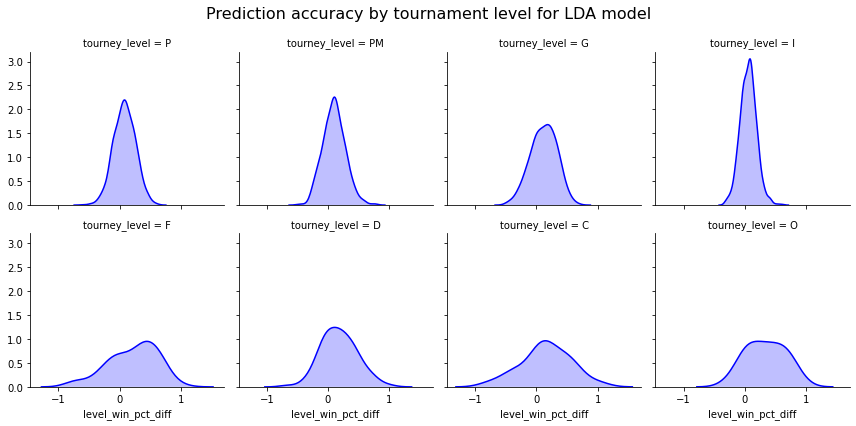

In [333]:
# What explains the increase in predictive accuracy for O, F, C, and D tournaments?

# There does not appear to be a significant advantage at these levels based on recent form
# However, for D (Fed Cup) and O (Olympics), there is a clear indication that matches are won by
# players who excel at these tournaments specifically, which is unique to these tournament levels.
# Why? The nature of these tournaments is fundamentally different (competing for your country
# rather than for yourself).
# They are also not open tournaments.

grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4)
grid.map(sns.kdeplot, 'level_win_pct_diff', shade = True, color = 'blue')

grid.fig.suptitle('Prediction accuracy by tournament level for LDA model', size = 16)
grid.fig.subplots_adjust(top=.875)

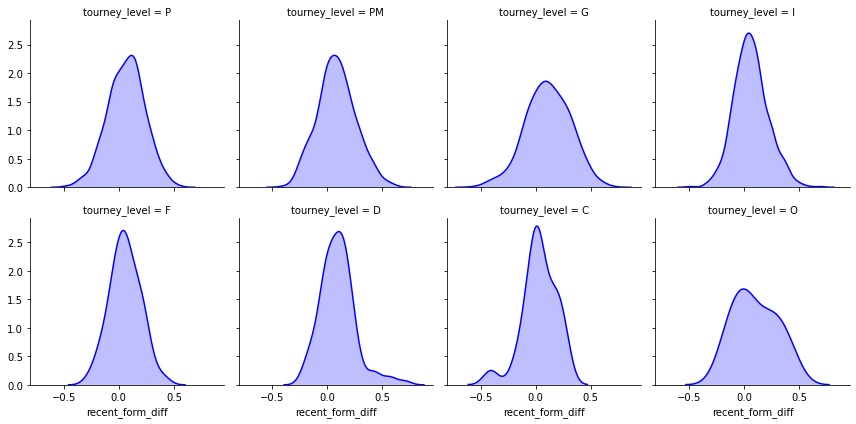

In [189]:
grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4)
grid.map(sns.kdeplot, 'recent_form_diff', shade = True, color = 'blue')

In [190]:
# measures of center and spread of players' rankings at different tournament levels

from scipy.stats import iqr
O = pred_rows[pred_rows['tourney_level'] == 'O']['player_1_rank']
print('Olympics:', 'Median', str(O.median()) + ',', 'IQR', iqr(O))

C = pred_rows[pred_rows['tourney_level'] == 'C']['player_1_rank']
print('Challenger:', 'Median', str(C.median()) + ',', 'IQR', iqr(C))

F = pred_rows[pred_rows['tourney_level'] == 'F']['player_1_rank']
print('WTA Finals:', 'Median', str(F.median()) + ',', 'IQR', iqr(F))

D = pred_rows[pred_rows['tourney_level'] == 'D']['player_1_rank']
print('Fed Cup:', 'Median', str(D.median()) + ',', 'IQR', iqr(D))

Olympics: Median 22.5, IQR 39.25
Challenger: Median 115.0, IQR 89.5
WTA Finals: Median 6.5, IQR 6.25
Fed Cup: Median 26.0, IQR 38.25


In [264]:
all_ranks = pd.concat([pred_rows['player_1_rank'], pred_rows['player_2_rank']])
cutoffs = np.insert(np.quantile(all_ranks, np.linspace(.1,1,10)), 0, 0)

In [265]:
pred_rows['player_1_bins'] = pd.cut(pred_rows['player_1_rank'],
                                    bins = cutoffs)

pred_rows['player_2_bins'] = pd.cut(pred_rows['player_2_rank'],
                                    bins = cutoffs)

In [289]:
gps = pred_rows.groupby(['player_1_bins', 'player_2_bins'])

mean_by_bin = gps.agg({'lower_ranked_won': ['mean', 'size']}).reset_index()

mean_by_bin = mean_by_bin.dropna(how = 'any', axis = 0)
mean_by_bin = mean_by_bin.sort_values(by = ('lower_ranked_won', 'mean'),
                                      axis = 0,
                                      ascending = False)

mean_by_bin.head(20)

# The table of medians and IQRs above, as well as the two data frames below, indicate that,
# unsurprisingly, the lower-ranked player wins more often when the two players in the match
# are similarly-ranked.
# This situation occurs more frequently in 'F' and 'C'-level tournaments.

# Overall conclusion: model performs better in tournaments where ranking 'matters less'

player_1_bins   player_2_bins lower_ranked_won     
                                               mean size
68    (40.0, 51.0]    (69.0, 95.0]         0.547619   42
21    (11.0, 17.0]     (5.0, 11.0]         0.537037   54
23    (11.0, 17.0]    (17.0, 23.0]         0.529412   34
12     (5.0, 11.0]    (11.0, 17.0]         0.500000   30
53    (30.0, 40.0]    (17.0, 23.0]         0.500000   36
64    (40.0, 51.0]    (23.0, 30.0]         0.500000   32
66    (40.0, 51.0]    (40.0, 51.0]         0.500000   28
13     (5.0, 11.0]    (17.0, 23.0]         0.500000   36
99  (95.0, 1323.0]  (95.0, 1323.0]         0.488889   45
56    (30.0, 40.0]    (40.0, 51.0]         0.488372   43
78    (51.0, 69.0]    (69.0, 95.0]         0.487805   41
65    (40.0, 51.0]    (30.0, 40.0]         0.466667   30
35    (17.0, 23.0]    (30.0, 40.0]         0.466667   30
67    (40.0, 51.0]    (51.0, 69.0]         0.463415   41
89    (69.0, 95.0]  (95.0, 1323.0]         0.460000   50
83    (69.0, 95.0]    (17.0, 23.0]         0.458333   24
77    (51.0, 69.0]    (51.0, 69.0]         0.454545   44
55    (30.0, 40.0]    (30.0, 40.0]         0.444444   27
76    (51.0, 69.0]    (40.0, 51.0]         0.441176   34
22    (11.0, 17.0]    (11.0, 17.0]         0.440000   25

In [290]:
mean_by_bin.tail(20)

player_1_bins   player_2_bins lower_ranked_won     
                                               mean size
29    (11.0, 17.0]  (95.0, 1323.0]         0.194444   36
50    (30.0, 40.0]      (0.0, 5.0]         0.193548   31
61    (40.0, 51.0]     (5.0, 11.0]         0.187500   32
73    (51.0, 69.0]    (17.0, 23.0]         0.185185   27
94  (95.0, 1323.0]    (23.0, 30.0]         0.185185   27
20    (11.0, 17.0]      (0.0, 5.0]         0.177778   45
38    (17.0, 23.0]    (69.0, 95.0]         0.172414   29
4       (0.0, 5.0]    (23.0, 30.0]         0.171429   35
28    (11.0, 17.0]    (69.0, 95.0]         0.166667   36
18     (5.0, 11.0]    (69.0, 95.0]         0.166667   30
6       (0.0, 5.0]    (40.0, 51.0]         0.160000   25
92  (95.0, 1323.0]    (11.0, 17.0]         0.160000   25
30    (17.0, 23.0]      (0.0, 5.0]         0.160000   50
49    (23.0, 30.0]  (95.0, 1323.0]         0.128205   39
90  (95.0, 1323.0]      (0.0, 5.0]         0.125000   24
60    (40.0, 51.0]      (0.0, 5.0]         0.108108   37
80    (69.0, 95.0]      (0.0, 5.0]         0.095238   21
91  (95.0, 1323.0]     (5.0, 11.0]         0.086957   23
8       (0.0, 5.0]    (69.0, 95.0]         0.076923   26
70    (51.0, 69.0]      (0.0, 5.0]         0.034483   29

In [297]:
#End by looking at some interesting examples of when the model worked well and when it didn't work well.

pred_rows_whole = matches3.loc[pred_rows.index].copy()

In [302]:
pred_rows_whole['correct'] = pred_rows['correct'].copy()
pred_rows_whole['lower_ranked_won'] = pred_rows['lower_ranked_won'].copy()

In [310]:
mask_correct = ((pred_rows_whole['correct'] == True) 
                & (pred_rows_whole['lower_ranked_won'] == True) 
                & (pred_rows_whole['tourney_level'] == 'G'))
mask_incorrect = ((pred_rows_whole['correct'] == False) 
                  & (pred_rows_whole['lower_ranked_won'] == False) 
                  & (pred_rows_whole['tourney_level'] == 'G'))

In [323]:
pred_rows_whole[mask_correct][['tourney_name',
                               'tourney_date',
                               'player_1_name',
                               'player_1_rank',
                               'player_2_name',
                               'player_2_rank',
                               'winner'
                              ]].sort_values(by = 'tourney_date', axis = 0).head(40)

# notable examples:
    [13377, 17444, 49652]

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
7641,Roland Garros,2002-05-27,Anne Kremer,25.0,Chanda Rubin,45.0,Chanda Rubin
7924,Wimbledon,2002-06-24,Magdalena Maleeva,19.0,Silvia Farina Elia,13.0,Magdalena Maleeva
8451,US Open,2002-08-26,Amy Frazier,73.0,Magdalena Maleeva,17.0,Amy Frazier
10890,Wimbledon,2003-06-23,Amanda Coetzer,15.0,Francesca Schiavone,37.0,Francesca Schiavone
11366,US Open,2003-08-25,Amanda Coetzer,16.0,Nadia Petrova,19.0,Nadia Petrova
13377,Wimbledon,2004-06-21,Anne Kremer,181.0,Fabiola Zuluaga,22.0,Anne Kremer
13389,Wimbledon,2004-06-21,Anna Smashnova,18.0,Katarina Srebotnik,68.0,Katarina Srebotnik
16107,Wimbledon,2005-06-20,Magdalena Maleeva,43.0,Shinobu Asagoe,24.0,Magdalena Maleeva
16137,Wimbledon,2005-06-20,Ludmila Cervanova,87.0,Nicole Pratt,121.0,Nicole Pratt
17444,Australian Open,2006-01-16,Martina Hingis,349.0,Vera Zvonareva,29.0,Martina Hingis


In [322]:
pred_rows_whole[mask_correct][['tourney_name',
                               'tourney_date',
                               'player_1_name',
                               'player_1_rank',
                               'player_2_name',
                               'player_2_rank',
                               'winner'
                              ]].sort_values(by = 'tourney_date', axis = 0).tail(35)

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
40417,Roland Garros,2014-05-26,Lucie Safarova,24.0,Svetlana Kuznetsova,28.0,Svetlana Kuznetsova
40642,Wimbledon,2014-06-23,Ana Ivanovic,11.0,Sabine Lisicki,19.0,Sabine Lisicki
40619,Wimbledon,2014-06-23,Kaia Kanepi,42.0,Yaroslava Shvedova,65.0,Yaroslava Shvedova
40659,Wimbledon,2014-06-23,Angelique Kerber,7.0,Eugenie Bouchard,13.0,Eugenie Bouchard
41068,US Open,2014-08-25,Heather Watson,46.0,Sorana Cirstea,80.0,Sorana Cirstea
43307,Wimbledon,2015-06-29,Casey Dellacqua,61.0,Elina Svitolina,17.0,Casey Dellacqua
43838,US Open,2015-08-31,Samantha Stosur,22.0,Sara Errani,16.0,Samantha Stosur
45941,Roland Garros,2016-05-23,Johanna Larsson,62.0,Tsvetana Pironkova,102.0,Tsvetana Pironkova
46265,Wimbledon,2016-06-27,Anastasia Pavlyuchenkova,23.0,Timea Bacsinszky,11.0,Anastasia Pavlyuchenkova
46226,Wimbledon,2016-06-27,Julia Goerges,78.0,Yaroslava Shvedova,96.0,Yaroslava Shvedova


In [316]:
pred_rows_whole[mask_incorrect][['tourney_name',
                                 'tourney_date',
                                 'player_1_name',
                                 'player_1_rank',
                                 'player_2_name',
                                 'player_2_rank',
                                 'winner'
                                ]].sort_values(by = 'tourney_date', axis = 0)

# notable examples:
    [21380, 26775, 32404]

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
6093,Australian Open,2002-01-14,Lisa Raymond,22.0,Magdalena Maleeva,16.0,Magdalena Maleeva
11389,US Open,2003-08-25,Kim Clijsters,1.0,Lindsay Davenport,4.0,Kim Clijsters
11380,US Open,2003-08-25,Elena Likhovtseva,36.0,Paola Suarez,25.0,Paola Suarez
13248,Roland Garros,2004-05-24,Anastasia Myskina,5.0,Jennifer Capriati,6.0,Anastasia Myskina
13239,Roland Garros,2004-05-24,Anastasia Myskina,5.0,Svetlana Kuznetsova,11.0,Anastasia Myskina
14076,US Open,2004-08-30,Jennifer Capriati,8.0,Serena Williams,11.0,Jennifer Capriati
13960,US Open,2004-08-30,Katarina Srebotnik,75.0,Tatiana Panova,90.0,Katarina Srebotnik
14069,US Open,2004-08-30,Lindsay Davenport,4.0,Venus Williams,12.0,Lindsay Davenport
14666,Australian Open,2005-01-17,Mariana Diaz Oliva,101.0,Saori Obata,109.0,Mariana Diaz Oliva
15941,Roland Garros,2005-05-23,Emmanuelle Gagliardi,105.0,Maria Sanchez Lorenzo,109.0,Emmanuelle Gagliardi


In [326]:
matches3.loc[[13377, 17444, 49652]][['player_1_name',
                                     'player_2_name',
                                     'winner',
                                     'player_1_rank',
                                     'player_2_rank',
                                     'player_1_level_win_pct',
                                     'player_2_level_win_pct',
                                     'player_1_surface_win_pct',
                                     'player_2_surface_win_pct',
                                     'player_1_h2h',
                                     'player_2_h2h',
                                     'player_1_recent_form',
                                     'player_2_recent_form'
                                   ]]

#kremer/zulu: kremer way ahead in surface win %, behind or tied in all other categories
#hingis/zvon: hingis had been retired for ~4 years, but past results weighed heavily
#cib/steph: steph only slightly ahead in all categories except rank. enough to predict correctly, apparently.

,player_1_name,player_2_name,winner,player_1_rank,player_2_rank,player_1_level_win_pct,player_2_level_win_pct,player_1_surface_win_pct,player_2_surface_win_pct,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form
13377,Anne Kremer,Fabiola Zuluaga,Anne Kremer,181.0,22.0,0.409091,0.600000,0.607143,0.000000,0.0,0.0,0.743628,0.802405
17444,Martina Hingis,Vera Zvonareva,Martina Hingis,349.0,29.0,0.818182,0.659091,0.827068,0.579832,0.0,0.0,1.025376,0.782062
49652,Dominika Cibulkova,Sloane Stephens,Sloane Stephens,10.0,83.0,0.642857,0.656250,0.588832,0.591463,1.0,2.0,0.790146,0.812793


In [331]:
matches3.loc[[21380, 55632, 32404]][['player_1_name',
                                     'player_2_name',
                                     'winner',
                                     'player_1_rank',
                                     'player_2_rank',
                                     'player_1_level_win_pct',
                                     'player_2_level_win_pct',
                                     'player_1_surface_win_pct',
                                     'player_2_surface_win_pct',
                                     'player_1_h2h',
                                     'player_2_h2h',
                                     'player_1_recent_form',
                                     'player_2_recent_form'
                                   ]]

# jankovic/venus: venus better or tied in all categories except rank. jankovic won
# pav/kiki: fairly split: pav leads in level & surface win pct, bertens leads in rank, h2h, recent form
# kiri/tan: tan much higher in surface win %, kiri ahead or tied in all other categories

,player_1_name,player_2_name,winner,player_1_rank,player_2_rank,player_1_level_win_pct,player_2_level_win_pct,player_1_surface_win_pct,player_2_surface_win_pct,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form
21380,Jelena Jankovic,Venus Williams,Jelena Jankovic,5.0,27.0,0.648649,0.835938,0.671053,0.794118,2.0,2.0,0.877771,1.098301
55632,Anastasia Pavlyuchenkova,Kiki Bertens,Kiki Bertens,45.0,7.0,0.552381,0.517857,0.591146,0.467066,2.0,3.0,0.705387,0.818516
32404,Maria Kirilenko,Tamarine Tanasugarn,Maria Kirilenko,27.0,108.0,0.565217,0.481928,0.379310,0.666667,1.0,1.0,0.696818,0.599276
